In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Ankle boot


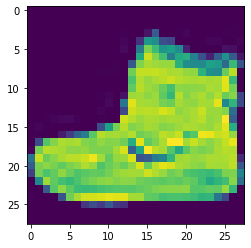

In [4]:
print(class_names[train_labels[0]])
plt.imshow(train_images[0])
plt.show()

In [5]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), # each image is 28x28 px
    keras.layers.Dense(128, activation=tf.nn.relu), # hidden layer
    keras.layers.Dense(10, activation=tf.nn.softmax) # output layer - probability we're looking at each class
                                                     # softmax sets the highest probability to 1, and the rest to 0, so the
                                                     # classificaiton is whichever neuron has 1 as the output
])

In [6]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', 
              metrics='accuracy')

In [7]:
model.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 2s 1ms/step - loss: 3.3263 - accuracy: 0.6806
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.7589 - accuracy: 0.7169
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6812 - accuracy: 0.7331
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.6375 - accuracy: 0.7444
Epoch 5/5
1875/1875 [==============================] - 2s 987us/step - loss: 0.5961 - accuracy: 0.7686


In [8]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

313/313 [==============================] - 0s 795us/step - loss: 0.6287 - accuracy: 0.7760


In [9]:
print(f'test acc: {test_acc}')
print(f'test loss: {test_loss}')

test acc: 0.7760000228881836
test loss: 0.6286731958389282


In [10]:
predictions = model.predict(test_images)

In [11]:
len(test_images)

10000

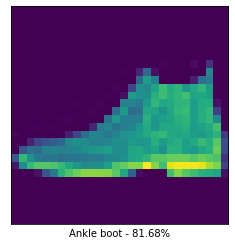

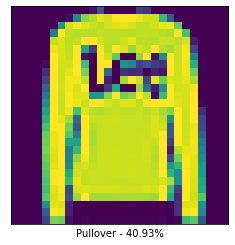

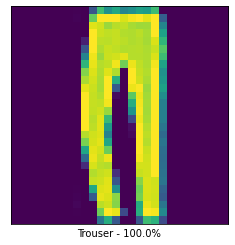

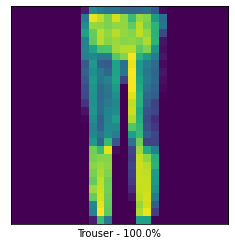

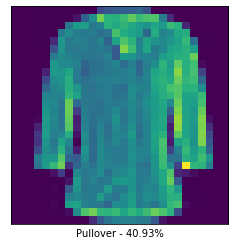

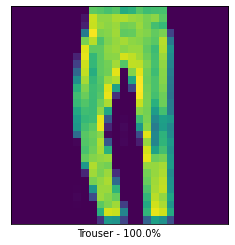

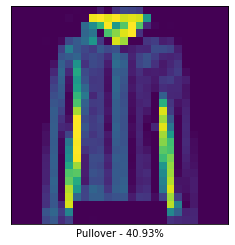

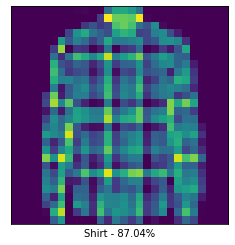

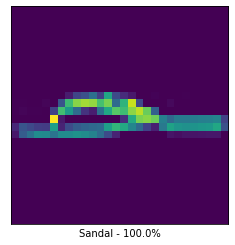

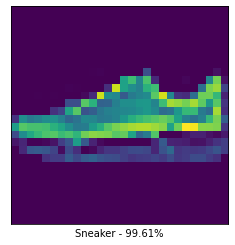

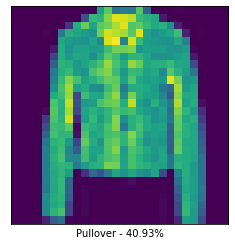

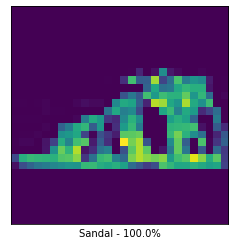

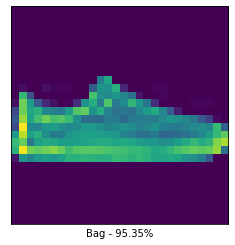

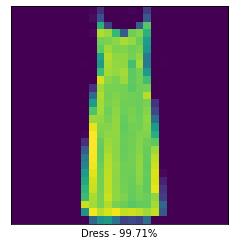

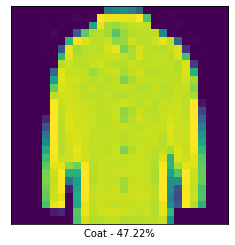

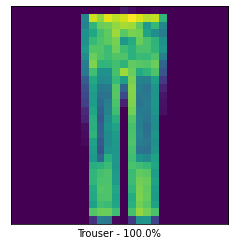

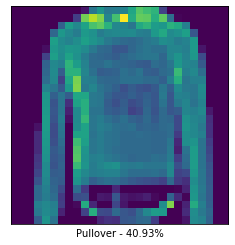

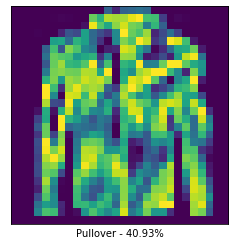

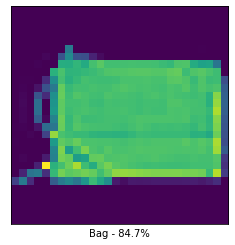

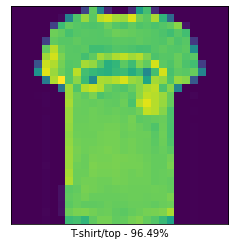

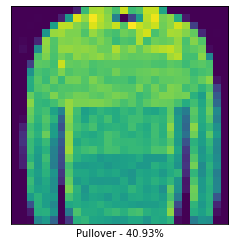

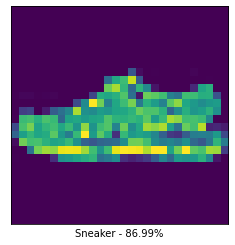

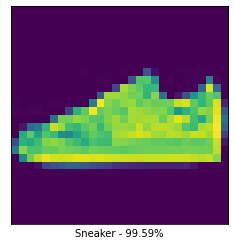

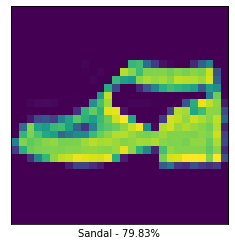

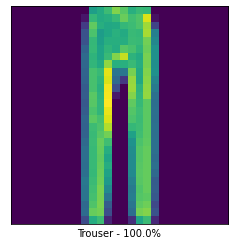

In [12]:
for i in range(25):
    plt.xticks([])
    plt.yticks([])
    pred_index = np.argmax(predictions[i])
    confidence = round(predictions[i][pred_index] * 100, 2)
    plt.xlabel(f'{class_names[pred_index]} - {confidence}%')
    plt.imshow(test_images[i])
    plt.show()